# Bootstrap Resampling demo

In [1]:
# Load (and install if neccesary) the StatGeochem package which has the resampling functions we'll want
try
    using StatGeochem
catch
    Pkg.clone("https://github.com/brenhinkeller/StatGeochem.jl")
    using StatGeochem
end

using Plots; gr();

## A super-quick example (Try pasting in your own data here!)

#### Input dataset

In [2]:
# We'll store the data in a data structure called a "dictionary"
test = Dict() 

# Make fields called "Latitude" and "Longitude" with locations
test["Latitude"] = [38.43, -28.0, -26.5, 31.3, 58.0, -9.55, 39.5, 49.58, -27.903, -27.8866, 48.0, -37.2, 9.0, 40.78, 4.87, 28.51, 14.8, -73.25, -17.2287, 36.0, 45.8086, 44.4, 32.0, 30.12, 46.25, 17.9, 29.5, 66.7377, 32.23, 26.65, 62.8264, -31.7138, 33.554, 40.78, 40.78, 40.88, 64.2385, 64.244, 61.0, 48.8, 48.8, 48.12, 27.3, -31.0, 40.85, -25.7017, 48.5, 47.6958, 35.78, 48.47, 50.78, 34.08, NaN, 64.8, NaN, -25.88, 0.132, 0.029, 41.3079, 40.5, 33.21, 33.6906, 40.49, 40.49, 37.5933, 39.2269, 39.4708, 32.9894, 32.8713, 41.685, 41.6183, 44.024, 49.1543, 38.923, 46.2828, 46.7075, 42.2381, 21.13, 37.3187, 28.3544, 40.25, 48.61, 7.51, 36.17, 38.68, 62.36, 41.96, 40.42, 39.21, 40.28, 35.96, 52.08, 57.58, 45.25, 61.0, 38.5, 45.11, 60.9, 59.95, 60.25, 43.37, 33.65, 37.63, 35.72, 45.39, 41.88, 46.76, 34.64, 40.75, 39.01, -72.03, 35.63, 37.42, 39.26, 35.44, 35.26, 35.2, 40.75, 45.11, 40.7, 42.12, 44.57, 38.5, 34.44, 48.53, 66.55, 59.66, 50.58, 46.44, 58.52, 44.25, 44.96, 50.58, 40.4, 39.37, 37.0, 42.4, 67.74, 44.01, 34.67, 35.93, -6.5, 22.0, 18.0, 35.0425, 66.0, 66.0, 10.5, 49.92, 39.32, -21.52, 14.83, 66.99, 38.88, 64.27, 68.0, 64.74, 35.78, -0.78, -21.34, 49.15, 56.92, 21.27, 50.81, 67.17, 40.5, 26.7, 36.96, 43.09, 48.24, 43.51, 71.0, 71.0, 71.0, 71.0, 47.13, 57.37, 39.9, 69.0, 44.0, 69.0, 41.55, 34.0, 67.18, -46.0,38.7, -32.6, -32.6, -25.78, -21.75, 54.75, -21.25, -33.37, 48.48, -34.4, -27.5, 40.9, 48.17, 62.6837, 62.5]
test["Longitude"] = [-105.65, 120.5, 31.0, 140.0, -72.75, 119.12, 26.0, 7.15, 121.161, 121.17, -80.0, 175.317, 38.7, 14.05, -2.27, 32.97, 39.9, 163.0, 124.896, -78.9, 2.8681, -116.7, 130.58, 35.27, -83.55, -65.75, 35.0, 28.9736, 81.23, 32.97, 31.2359, 151.414, 51.887, 14.03, 14.05, 14.42, 29.1105, 29.0606, -131.0, -87.27, -87.0, -77.77, 142.3, 121.5, 14.3, -68.4775, -79.03, -66.5, -106.16, -81.4, 121.52, 139.52, NaN, -51.7, NaN, 30.77, -78.284, -77.986, -121.575, -121.0, -108.749, -107.941, -121.51, -121.51, -119.06, -120.081, -120.037, -110.499, -110.51, -121.688, -121.572, -121.721, -120.422, -114.243, -116.108, -115.092, -122.24, -104.52, -119.661, -109.959, -104.083, -93.31, -64.27, -78.65, -77.6, -153.81, -105.42, -75.45, -77.48, -75.75, -116.21, -173.91, -134.99, -117.5, -152.25, -112.75, -109.9, -152.95, -153.06, -153.0, -111.37, -108.09, -114.48, -116.32, -121.73, -105.3, -121.78, -80.41, -106.0, -118.31, -65.08, -80.39, -106.59, -121.02, -115.42, -114.15, -114.06, -106.0, -109.9, -118.23, -72.12, -110.8, -117.0, -113.34, -117.1, -149.13, -151.99, 19.32, -115.49, -134.02, -107.12, -89.61, 19.32, -121.68, -105.25, -116.25, -116.89, -159.51, -68.76, -117.02, -79.42, -49.5, 99.7, -100.17, 118.036, -30.0, -30.0, -85.0, -55.83, -106.92, -65.69, -24.68, 28.88, -7.17, 29.07, -32.0, -49.94, 118.19, -91.03,119.75, -55.37, -6.25, 104.25, 15.9, -62.44, 26.5, 101.5, -118.89, -120.84, -109.68, -115.51, 102.0, 102.0, 102.0, 102.0, -108.58, -134.38, -105.5, 89.0, -68.75, 89.0, -72.11, -98.0, -159.86, 73.0, 114.6, -65.7, -65.7, 31.05, 120.0, -5.75, 119.25, 146.23, -81.33, 150.5, 119.0, 14.2, -79.75, -114.323, -114.5]

# Fill in some other fields with age [Ma], major element [wt. %], and trace elements [ppm] data
# Notice there are some NaNs, but this is OK. This is a small sampling of real data from EarthChem
test["Age"] = [1666.0, 2650.0, 3560.0, 0.0, 2725.0, 63.2, 32.75, 275.0, 2710.0, 2710.0, 2670.0, 12.5, 3.95, 0.0106, 3250.0, 975.0, 1.305, 180.0, 1864.0, 173.55, 1.305, 14.15, 1.45, 695.0, 2450.0, 105.8, 572.5, 2425.0, 21.0, 975.0, 2650.0, 404.0, 44.85, 0.0245, 1.305, 0.037, 2750.0, 2750.0, 367.0, 2100.0, 2100.0, 1400.0, 44.85, 2800.0, 0.00395, 12.8, 2750.0, 466.5, 2.515, 2750.0, 138.0, 0.0049, 2750.0, 3110.0, 3000.0, 3443.0, 0.25, 0.2, 0.0106, 6.1, 30.5, 29.0, 0.3, 0.05, 104.0, 4.75, 11.9, 27.0, 23.5, 0.29, 0.29, 0.46, 50.5, 155.0, 119.1, 80.0, 2.78, 2.0, 114.0, 58.8, 1.61, 2750.0, 975.0, 175.0, 175.0, 33.4, NaN, 175.0, 175.0, 175.0, 14.55, 72.9, 395.5, 14.55, 156.5, 0.9, 33.4, 175.0, 0.9, 175.0, 32.5, 33.4, 14.55, 14.55, 0.9, 2100.0, 0.005, 395.0, NaN, 104.5, 135.5, 395.0, 33.4, 156.5, 2100.0, 2100.0, 14.55, NaN, 33.4, 156.5, 395.5, 0.9, 33.4, 14.55, 104.5, 72.9, 156.5, 395.5, 104.5, 33.4, NaN, 2100.0, 395.5, 0.905, 2100.0, 3.55, 33.4, 25.0, 385.5, 175.0, 395.0, 975.0, 305.0, 122.55, 122.55, 44.25, 44.25, 77.75, 466.0, 1.305, 20.0, 1.55, 2415.0, 531.5, 2750.0, 63.6, 3080.0, 2750.0, 0.0, 3380.0, 466.0, 60.5, 260.0, 466.0, 60.0, 32.75, 761.0, 3.6, 5.89, 52.0, 0.2, 227.0, 227.0, 227.0, 227.0, 44.25, 33.4, 2100.0, 227.0, 385.5, 227.0, 395.0, 1400.0, 25.0, 150.0, 2000.0, 400.0, 400.0, 2800.0, 3500.0, 34.05, 3450.0, 396.5, 2750.0, 255.5, 3250.0, 0.037, 2750.0, 2800.0, 2660.0]
test["SiO2"] = [68.9, 64.51, 69.5, 69.158, 69.41, 59.4, 66.89, 68.71, 55.42, 65.04, 71.45, 57.81, 56.24, 59.15, 52.87, 62.49, 50.22, 57.02, 69.64, 50.1, 51.41, 56.07, 63.17, 74.9, 56.1, 67.15, 50.8, 59.9, 69.42, 56.85, 64.9, 67.43, 73.7, 57.92, 60.03, 60.97, 52.7, 54.7, 75.1, 53.5, 72.0, 50.5, 57.6, 62.2, 57.13, 61.1, 62.3, 57.48, 52.06, 50.7, 54.5, 53.28, 66.82, 71.05, 68.19, 71.46, 69.17, 66.61, 52.4, 63.51, 56.0, 65.57, 59.15, 69.97, 70.17, 57.58, 57.69, 72.83, 73.4, 53.7, 62.7, 64.2, 66.15, 70.9, 70.7, 77.9, 53.52, 67.91, 59.47, 66.5, 77.11, 50.4, 50.5, 51.3, 51.4, 51.6, 51.7, 52.1, 52.2, 52.2, 53.6, 53.71, 54.9, 55.0, 55.5, 56.0, 56.3, 57.4, 57.6, 58.4, 59.2, 60.0, 60.5, 60.8, 61.0, 62.3, 62.4, 63.2, 63.6, 64.0, 64.4, 65.2, 65.5, 65.5, 65.7, 65.7, 65.8, 65.8, 66.6, 66.7, 66.8, 67.1, 67.7, 67.8, 67.8, 68.4, 68.7, 68.9, 69.0, 69.1, 71.3, 71.9, 73.0, 73.8, 74.4, 75.6, 76.0, 76.0, 76.2, 76.4, 77.0, 48.99, 42.45, 41.3, 48.61, 48.81, 49.25, 48.98, 44.71, 49.52, 42.92, 43.75, 44.9, 44.87, 48.39, 48.3, 48.41, 45.88, 48.21, 49.89, 45.12, 41.87, 44.37, 47.66, 46.38, 44.1, 44.22, 48.1, 48.82, 46.39, 49.2, 41.2, 43.0, 44.4, 45.3, 46.9, 47.2, 47.4, 47.5, 48.1, 48.5, 48.8, 49.1, 49.7, 74.331, 74.33, 71.5, 77.8661, 52.88, 61.78, 52.6, 67.27, 72.58, 50.36, 60.64, 50.71, 62.01, 50.1, 62.34, 53.48]
test["TiO2"] = [0.63, 0.52, 0.36, 0.797, 0.38, 0.62, 0.46, 0.21, 0.99, 0.63, 0.63, 0.73, 2.04, 0.42, 0.86, 0.73, 1.44, 1.97, 0.28, 0.96, 1.89, 2.08, 0.71, 0.1, 0.75, 0.74, 1.83, 0.84, 0.61, 1.52, 0.48, 0.14, 0.19, 0.49, 0.44, 0.43, 0.513, 0.666, 0.14, 1.15, 0.2, 0.45, 0.14, 0.42, 0.49, 0.98, 0.9, 0.97, 1.48, 0.64, 1.16, 1.35, 0.46, 0.24, 0.49, 0.26, 0.3, 0.48, 0.92, 0.62, 1.31, 0.62, 0.63, 0.35, 0.34, 0.82, 0.655, 0.19, 0.24, 1.2, 1.27, 1.03, 0.62, 0.34, 0.322, 0.01, 1.05, 0.61, 0.85, 0.48, 0.05, 2.03, 1.64, 0.74, 0.82, 1.7, 0.23, 1.08, 1.14, 1.01, 1.48, 1.33, 0.21, 2.3, 1.0, 1.39, 5.00543e-5, 0.88, 0.61, 0.62, 2.0, 1.14, 0.95, 0.44, 0.86, 0.34, 0.79, 0.85, 0.89, 0.4, 0.4, 0.45, 0.5, 0.27, 0.86, 1.05, 0.53, 0.79, 2.50271e-5, 0.45, 1.1, 0.19, 0.28, 0.33, 0.4, 0.57, 0.4, 0.42, 0.26, 0.42, 0.3, 0.56, 0.31, 0.26, 0.35, 0.14, 0.14, 0.19, 0.11, 0.23, 0.07, 0.9, 0.565, 1.5, 1.095,2.58, 2.88, 0.99, 2.23, 1.68, 1.51, 0.91, 0.48, 3.29, 0.13, 2.49, 0.43, 0.14, 3.61, 1.04, 3.94, 0.53, 0.69, 3.25, 1.06, 2.31, 2.36, 0.88, 1.08, 0.93, 2.08, 4.38, 3.39, 3.55, 4.96, 0.15, 1.68, 1.2, 1.3, 1.3, 1.54, 1.06, 0.36, 0.82, 0.183, 0.06, 0.43715, 0.44, 0.3, 0.7, 0.99, 0.42, 0.62, 10.86, 1.16, 0.73, 0.41, 0.7, 0.83, 1.15]
test["Al2O3"] = [14.0, 15.57, 16.44, 14.027, 15.37, 16.7, 14.23, 15.91, 15.71, 15.19, 13.4, 18.32, 15.32, 17.57, 16.17, 15.64, 15.09, 12.1, 15.29, 17.1, 17.85, 13.58, 15.54, 11.75, 14.4, 12.75, 15.3, 13.6, 14.06, 15.85, 16.5, 10.41, 12.54, 18.41, 18.61, 18.56, 10.8, 13.1, 13.6, 15.2, 15.9, 16.6, 11.11, 15.39, 18.89, 16.52, 14.98, 16.75, 17.3, 15.4, 16.1, 14.87, 14.93, 15.75, 15.33, 15.0, 15.74, 16.5, 17.0, 16.41, 15.5, 16.8, 18.14, 15.47, 15.22, 17.57, 17.22, 12.94, 13.6, 17.5, 16.2, 16.1, 15.54, 15.0, 14.05, 12.1, 17.69, 15.23, 17.18, 15.3, 12.62, 14.8,13.1, 15.5, 15.1, 16.4, 7.66, 15.0, 14.0, 14.4, 17.0, 15.22, 21.3, 12.9, 18.6, 15.5, 18.0, 16.6, 17.7, 17.1,15.5, 15.2, 15.2, 14.1, 17.4, 17.5, 17.2, 15.9, 13.6, 17.2, 16.4, 28.0, 13.9, 16.9, 16.4, 13.4, 15.4, 14.3, 18.5, 16.0, 15.0, 16.4, 13.6, 15.3, 16.1, 15.2, 13.9, 15.2, 16.4, 15.6, 14.8, 13.6, 13.4, 14.12, 14.7, 10.79,11.9, 12.5, 13.0, 12.6, 12.0, 16.06, 8.793, 14.6, 11.77, 14.34, 14.0, 14.01, 14.47, 15.93, 14.39, 16.98, 6.19, 12.84, 4.69, 15.13, 10.87, 4.28, 14.41, 14.13, 14.85, 5.86, 8.49, 13.63, 13.55, 12.7, 15.97, 13.3, 16.93, 10.76, 16.7, 9.5, 6.76, 12.0, 11.7, 17.5, 17.5, 14.4, 16.6, 16.6, 15.1, 15.4, 27.2, 16.0, 13.235, 12.64, 14.1311, 1.34153, 11.09, 15.31, 14.48, 15.79, 12.8, 0.56, 15.71, 8.98, 18.87, 18.07, 15.96, 13.08]
test["FeOT"] = [4.38208, 3.91417, 2.76242, 4.18412, 3.52726, 6.33, 3.49, 2.47, NaN, NaN, 4.3, 7.21764, 7.93, 2.56, 7.73, 5.94, 10.12, 14.7056, 2.33693, 9.79943, 9.01, 12.21, 6.8, NaN, NaN, 7.41, 7.44534, 9.96, 3.1, 7.85, 4.21, 4.65232, 1.6159, 4.17, 3.5, 3.29, 9.41, 10.5, 2.79, 9.81, 1.71, 6.85, 8.57, 3.68, 4.05, 5.19, 8.25, 7.07, NaN, 12.24, 7.68, 12.73, 4.74, 1.4, 2.32, 1.96, 3.02, 3.75, NaN, 4.6758, NaN, NaN, 5.32, 2.43, NaN, NaN, NaN, 1.20679, 1.15977, 8.72, 4.99, 5.44, NaN, 2.17977, 4.32, 0.31, 7.72037, 3.52476, NaN, 3.62569, 1.13, 13.2272, 15.5667, 9.98789, 10.7696, 8.84971, 8.89912, 9.62797, 10.3478, 9.53799, 7.87334, 10.8697, 3.86019, 11.7694, 6.59943,8.42222, 6.01073, 6.69943, 6.13671, 6.28967, 7.80945, 6.37066, 5.35387, 1.97058, 5.34487, 4.64302, 4.68801, 6.46964, 6.46975, 3.93217, 3.41028, 0.152968, 5.32688, 3.49126, 4.81398, 5.99274, 2.80741, 5.68182, 2.8524, 3.24972, 5.26483, 1.37973, 1.4397, 2.15055, 3.09535, 2.47962, 3.52726, 2.16854, 1.97058, 2.51947, 2.60584, 2.69943, 1.8986, 1.38977, 1.9166, 0.759845, 1.11576, 0.746843, 0.37792, 0.791833, 1.30472, 12.4354, 9.244, 9.79943, 7.96, 11.8722, 12.9862, NaN, 15.0, 9.27, NaN, 4.45, 9.67, 12.35, 5.57, 11.9, NaN, NaN, 13.11, 12.67, 15.0102, 9.63, 10.85, 10.65, 10.83, NaN, 10.2, 9.08808, NaN, NaN, 10.58, 13.4072, 11.9675, 12.7773, 13.4972, 1.81762, 8.13428, 10.3493, 11.4276, 9.17959, 12.0575, 9.98789, 3.99516, 8.45822, 0.85482, 1.18, 2.20454, 1.99758,6.72174, 6.39068, 10.07, 3.24, 2.93, 11.5696, 7.08493, 9.28, 0.39, 6.85032, 5.42, 8.45]
test["MgO"] = [0.7, 1.85, 1.02, 1.092, 1.44, 3.26, 0.46, 1.09, 4.76, 1.66, 0.56, 3.72, 2.14, 0.29, 3.99, 2.11, 7.78, 2.36,0.5, 5.4, 3.61, 3.32, 2.22, 0.16, 5.15, 2.03, 4.47, 4.43, 0.82, 4.55, 2.54, 1.53, 0.3, 1.19, 0.71, 0.38, 11.5, 5.06, 1.0, 7.2, 1.3, 5.82, 11.67, 4.57, 0.96, 2.8, 4.38, 7.82, 4.5, 5.83, 2.49, 3.96, 2.21, 0.7, 0.77, 0.91, 1.48, 1.54, 7.2, 2.65, 6.5, 1.12, 4.16, 1.35, 0.53, 3.86, 3.478, 0.18, 0.47, 5.16, 1.75, 1.73, 2.22, 0.98,1.62, 0.16, 5.63, 0.7, 4.15, 1.93, 0.02, 2.58, 4.97, 6.77, 7.3, 3.5, 22.3, 7.18, 7.64, 7.31, 4.04, 3.76, NaN, 3.6, 3.8, 3.98, 1.57, 3.4, 4.53, 2.96, 3.0, 2.85, 3.09, 1.39, 2.41, 0.15, 2.28, 2.18, 0.68, 1.45, 2.8, NaN,0.96, 1.66, 1.94, 1.11, 1.23, 0.62, 0.43, 1.8, 0.82, NaN, 0.35, 1.08, 1.11, 0.68, 1.01, 1.02, 0.56, 0.54, 0.77, 0.44, 0.76, 0.16, 0.38, 0.52, NaN, 0.12, 0.12, NaN, NaN, 7.68, 26.05, 7.9, 13.605, 6.83, 5.65, 8.63, 6.1,6.91, 6.78, 1.83, 22.6, 3.65, 24.45, 5.96, 14.9, 35.21, 5.39, 7.0, 6.19, 34.14, 21.64, 8.08, 14.02, 13.9, 3.91, 13.5, 7.54, 6.62, 6.6, 8.41, 12.6, 7.98, 4.93, 0.76, 2.39, 9.7, 6.64, 8.3, 6.31, 9.45, 3.08, 6.95, 0.366,0.89, 0.16, 0.69, 12.57, 2.63, 6.42, 1.39, 0.73, 15.75, 0.84, 13.49, 0.37, 2.71, 1.98, 6.83]
test["CaO"] = [2.04, 4.01, 3.17, 4.271, 3.27, 6.36, 3.64, 0.2, 6.82, 3.26, 1.02, 7.57, 4.2, 1.92, 9.0, 3.64, 11.27, 6.98, 3.36, 11.1, 7.54, 7.14, 5.29, 1.25, 5.78, 3.43, 6.28, 2.5, 2.4, 7.11, 2.06, 5.41, 1.29, 3.96, 3.02, 1.82, 8.95, 8.76, 0.3, 8.0, 1.9, 11.6, 7.26, 3.84, 3.6, 5.36, 5.37, 0.72, 7.91, 7.4, 4.37, 8.89, 4.85, 2.6, 2.9, 2.64,3.82, 3.78, 9.75, 5.33, 5.59, 2.84, 6.81, 3.12, 2.28, 6.78, 6.388, 0.41, 0.44, 8.94, 4.16, 3.88, 4.32, 2.4, 2.83, 0.3, 8.04, 2.09, 6.67, 4.29, 0.17, 6.92, 9.19, 11.6, 10.9, 5.7, 6.9, 11.5, 10.9, 11.1, 7.1, 6.9, 4.64, 6.8, 7.0, 6.69, 1.53, 5.9, 7.83, 6.47, 7.1, 5.01, 4.95, 4.7, 5.44, 1.98, 5.52, 1.78, 3.8, 4.38, 5.21, 0.18, 0.66, 5.1, 4.33, 3.2, 2.94, 2.4, 1.01, 4.0, 2.9, 0.31, 0.95, 2.77, 3.42, 1.7, 5.38, 2.33, 3.14, 1.97, 2.85, 1.5, 1.72, 0.61, 0.19, 1.44, 0.32, 0.02, 0.03, 0.12, 0.37, 11.25, 6.434, 10.8, 8.775, 10.92, 10.25, 11.66, 9.97, 8.54, 18.54, 10.2, 5.4, 6.78, 9.1, 11.7, 11.26, 4.06, 10.54, 10.72, 9.92, 4.5, 8.86, 9.02, 11.55, 7.95, 9.75, 9.85, 11.45, 11.6, 9.62, 14.3, 15.1, 10.5, 9.5, 9.28, 10.3, 9.3, 10.3, 8.7, 10.2, 9.55, 13.6, 11.7, 3.339,0.25, 0.93715, 0.27173, 10.39, 6.84, 10.38, 2.94, 1.11, 7.46, 2.95, 6.41, 1.8, 5.59, 4.04, 4.09]
test["Na2O"] = [3.3, 4.78, 5.27, 4.369, 4.72, 3.49, 2.31, 3.99, 3.52, 5.06, 3.51, 3.17, 5.45, 4.99, 3.34, 4.2, 2.62, 2.0, 2.72, 2.83, 4.43, 3.22, 3.04, 3.85, 0.26, 4.1, 3.79, 4.7, 3.04, 3.61, 4.53, 4.36, 1.72, 3.23, 4.09, 5.96, 3.37, 2.64, 0.1, 3.6, 2.3, 2.31, 1.81, 8.15, 3.87, 4.12, 2.57, 3.98, 4.63, 2.58, 3.05, 2.82, 4.07, 5.59, 3.89, 5.54, 4.11, 4.21, 2.88, 3.44, 3.72, 3.27, 3.91, 4.23, 4.11, 3.43, 3.056, 4.1, 3.6, 3.63, 5.67, 5.41, 4.45, 3.5,3.97, 3.47, 3.83, 5.31, 3.02, 3.21, 3.93, 5.01, 1.87, 2.27, 2.1, 2.9, 0.77, 2.01, 1.92, 1.84, 3.7, 4.07, 5.16, 2.9, 4.4, 3.58, 4.05, 3.8, 3.69, 2.79, 2.8, 3.38, 3.04, 5.08, 4.14, 4.34, 4.08, 1.72, 3.4, 3.94, 3.78, NaN, 1.84, 3.8, 2.83, 2.78, 3.3, 3.75, 5.33, 3.6, 2.7, 4.7, 3.39, 4.01, 3.26, 4.0, 4.3, 3.74, 4.3, 3.91, 4.92, 1.8, 2.96, 2.63, NaN, 0.85, 3.07, 3.02, 4.7, 3.68, 4.17, 1.65, 0.69, 3.3, 1.925, 2.24, 2.61, 2.59, 2.97, 3.49,5.93, 8.26, NaN, 4.72, 0.0, 2.47, 1.23, 0.15, 3.21, 2.38, 3.4, 0.79, 0.93, 3.46, 1.42, 2.36, 3.88, 2.6, 2.86, 2.92, 2.9, 2.35, 1.54, 3.33, 3.02, 8.61, 3.13, 2.0, 2.38, 3.5, 2.35, 2.97, 2.68, 2.84, 4.016, 3.12, 3.6, 4.14, 2.96, 3.01, 2.73, 4.88, 2.46, 2.82, 4.29, 2.92, 5.53, 2.64, 7.19, 3.59]
test["K2O"] = [4.61, 2.05, 1.28, 0.57, 1.39, 1.63, 5.36, 4.57, 0.57, 2.42, 2.34, 0.93, 3.07, 7.1, 0.98, 2.82, 0.73, 2.19, 4.38, 0.51, 2.53, 1.81, 2.64, 4.53, NaN, 0.4, 3.2, 2.44, 6.06, 1.61, 2.99, 0.47, 5.78, 8.51, 8.95, 7.94, 0.109, 0.131, 5.2, 0.1, 4.5, 0.64, 0.55, 0.22, 8.41, 2.77, 0.89, 4.07, 2.07, 0.06, 3.19, 0.56, 1.79, 1.64, 1.42, 1.6, 1.81, 2.48, 0.97, 2.94, 3.02, 3.96, 1.49, 2.82, 4.05, 2.03, 2.17, 4.69, 5.2, 0.71, 1.88, 2.22, 2.46, 3.3, 0.67, 5.09, NaN, 3.73, 2.47, 3.23, 4.89, 0.44, 0.17, 0.47, 0.52, 2.2, 0.09, 0.57, 0.4, 0.6, 1.72, 0.64, 5.09, 1.5, 1.0, 2.09, 8.04, 2.2, 0.8, 1.61, 1.2, 3.57, 3.84, 5.04, 1.36, 6.83, 1.79, 3.58, 4.56, 2.57, 1.91, 0.26, 5.31, 1.86, 1.82, 4.42, 4.32, 4.82, 6.39, 3.0, 3.7, 8.2, 5.24, 3.62, 3.01, 5.0, 0.03, 3.81, 2.68, 4.49, 1.45, 6.6, 4.43, 4.6, 4.96, 5.03, 5.34, 5.88, 4.7, 5.27, 3.39, 0.28, 0.05, 0.1, 2.615, 0.18, 0.38, 0.16, 0.23, 2.61, 0.11, 3.83, 0.01, 0.22, 0.01, 0.29, 0.15, 0.07, 0.56, 0.04, 0.46, 0.08, 0.24, 1.49, 0.03, 1.52, 0.62, 1.0, 0.47, 2.91, 1.69, 1.37, 1.14, 1.86, 2.06, 1.0, 0.46, 2.2, 0.36, 0.43, 0.54, 0.34, 0.13, 0.11, 0.167, 4.7,5.86134, 2.2, 0.22, 0.37, 0.84, 1.71, 5.46, 0.13, 5.22, 1.71, 7.48, 6.55, 0.56, 0.29]
test["La"] = [62.0, NaN, 30.4, 4.42, 42.0, 14.0, 42.5, 110.0, 13.12, 43.65, NaN, 9.3, 83.0, 106.0, 7.51, 30.8, 16.86, 24.4, 54.0, 7.1, 66.2, 26.5, 25.8, NaN, 31.0, 7.2, 24.0, 26.0, 84.0, NaN, NaN, 2.77, 36.46, 55.0, 70.8, 132.0, 10.0, 10.0, 38.0, 5.3, 10.2, 16.63, 0.8, 27.4, 78.0, 52.0, 11.8, 13.6, 75.47, 2.29, 29.9, 3.56, 20.92, NaN, NaN, NaN, 11.8, 22.0, 7.6, 25.3, 46.4, 52.2, 13.0, 23.0, 33.57, 26.94, 19.79, 70.0, 50.0, 8.8, 19.6, 24.9, 22.0, 30.0, 14.0, 33.0, 21.1, 39.35, 16.92, 23.27, 44.57, 16.3, 1.7, 7.2, 7.22, 50.0, 1.0, 10.1, 11.2, 11.0, 36.0, 9.08, 53.0, 17.5, 50.0, 47.8, 70.0, 24.0, 5.93, 14.0, 73.0, 72.0, 56.8, 120.0, 17.0, 590.0, 22.4, 29.5, 85.1, 20.0, 19.0, 44.3, 59.0, 13.0, 102.0, 97.0, 49.0, 35.7, 50.0, 39.0, 300.0, 89.0, 70.0, 22.2, 45.9, 150.0, 2.8, 28.0, 40.5, 52.0, 18.5, 93.3, 23.0, 50.0, 108.0, 30.0, 489.0, 51.3, 26.4, 18.4, 27.1, 3.95, 0.987, 6.5, 100.25, 9.206, 12.408, 2.84, 12.58, 70.0, 24.26, 78.0, 0.3, 19.0, 8.0, 10.7, 2.25, 0.66, 20.3, 2.67, 24.6, 1.78, 4.12, 35.0, 3.91, 31.0, 7.7, 37.0, 12.0, 17.0, 20.18, 130.0, 85.4, 66.3, 95.8, 55.4, 16.1, 150.0, 9.04, 4.36, 9.01, 1.9, 4.0, 3.26, 22.923, 103.0, NaN, NaN, NaN, NaN, 10.86, NaN, 65.8, NaN, 44.7, 3.63, 114.0, NaN, 30.0, 32.32]
test["Yb"] = [9.0, NaN, 1.29, 4.4, 0.3, 2.25, 1.52, NaN, 2.28, 0.89, NaN, 2.2, 4.8, 4.2, 1.31, 3.38, 2.25, 5.25, NaN, 3.7, 2.87, 3.66, 3.1, 6.0, NaN, 3.49, 1.96, 1.82, 0.8, NaN, NaN, 0.45, 2.46, 2.2, 2.67, 5.6, NaN, NaN, 5.9, 3.26, 0.51, 1.99, 0.63, 0.95, 2.5, 1.0, 2.92, 2.2, 2.19, 3.4, 1.05, 3.59, 1.56, NaN, NaN, NaN, 0.7, 0.74, 2.69, 2.1, 1.89, 1.57, 1.3, 1.12, 0.52, 1.65, 1.84, 3.0, 3.0, 2.27, 3.23, 3.7, 0.84, 1.0, 2.05, 1.33, 2.5, 3.78, 2.39, 1.79, 8.0, 6.29, 3.0, 3.3, 2.5, 3.0, 0.59, 2.0, 2.3, 2.1, 2.3, 3.37, 5.6, 4.87, 2.0, 3.21, 3.0, 2.0, 1.84,1.4, 7.1, 5.0, 2.25, 2.4, 1.35, 15.0, 1.65, 3.81, 12.9, 2.0, 1.2, 0.99, 1.0, 1.0, 1.56, NaN, 2.02, 6.74, 1.0, 1.4, 20.0, 7.9, 3.0, 0.85, 1.3, 3.0, 0.62, NaN, 0.67, 1.6, NaN, 3.72, 1.0, 3.0, 13.0, 2.0, 8.53, 5.34, 6.98, 5.87, 15.3, 2.01, 1.046, 2.5, 1.64494, 2.43, 2.841, 2.07, NaN, 2.78, 1.96, 2.7, NaN, NaN, NaN, 2.17, 1.24, 0.37, 3.05, 2.58, 2.3, 0.64, 1.26, 2.11, 2.05, 1.3, 3.29, 1.5, 2.2, NaN, 2.4, 1.0, 1.4, 1.8, 2.4, 3.44, 3.1, 5.0, 2.87, 3.12, 3.15, 3.2, NaN, 1.96, 3.02601, 5.42, NaN, NaN, NaN, 2.0, 2.39, NaN, 4.2, NaN, 4.28, 1.48, 4.9, NaN, NaN, 2.2]

# We're also going to want a list called "elements" with names of all the fields we want to resample
elements = ["Latitude","Longitude","Age","SiO2","TiO2","Al2O3","FeOT","MgO","CaO","Na2O","K2O","La","Yb"]

# Now let's add uncertainties, starting with age uncertainty
test["Age_sigma"] = [NaN, 5.0, 5.0, NaN, 5.0, 3.7, 16.375, 12.0, 5.0, 5.0, 10.0, 1.25, 0.675, 10.0, 125.0, 62.5, 0.6475, 10.0, 10.0, 14.025, 0.6475, 4.425, 0.065, 77.5, 10.0, 3.1, 21.25, 12.5, 2.0, 62.5, 75.0, 9.5, 5.475, 0.00625, 0.6475, 10.0, 125.0, 125.0, 24.5, 200.0, 200.0, 150.0, 5.475, 100.0, 7.5e-5, 5.1, 125.0, 2.75, 0.0275, 125.0, 12.5,0.00295, 5.0, 5.0, 5.0, 5.0, 0.125, 0.1, 0.00053, 2.95, 1.9, 1.25, 0.15, 0.025, 19.75, 0.625, 1.25, 1.5, 0.35, 0.13, 0.13, 0.015, 1.75, 7.75, 2.5, 7.5, 0.05, 0.5, 1.0, 0.8, 0.005, 125.0, 62.5, 15.5, 15.5, 15.8, NaN, 15.5, 15.5, 15.5, 4.625, 35.55, 73.75, 4.625, 45.75, 0.45, 15.8, 15.5, 0.45, 15.5, 16.25, 15.8, 4.625, 4.625, 0.45, 200.0, 0.0025, 72.5, NaN, 19.75, 35.25, 72.5, 15.8, 45.75, 200.0, 200.0, 4.625, NaN, 15.8, 45.75, 73.75, 0.45, 15.8, 4.625, 19.75, 35.55, 45.75, 73.75, 19.75, 15.8, NaN, 200.0, 73.75, 0.4475, 200.0, 0.875, 15.8, 12.5, 15.75, 15.5, 72.5, 62.5, 27.0, 11.475, 11.475, 10.625, 10.625, 6.125, 11.0, 0.6475, 10.0, 0.125, 17.5, 5.25, 125.0, 0.95, 10.0, 25.0, 10.0, 70.0, 11.0, 10.0, 10.0, 11.0, 10.0, 16.375, 10.0, 0.1, 0.06, 1.0, 0.075,10.5, 10.5, 10.5, 10.5, 5.275, 15.8, 200.0, 10.5, 15.75, 10.5, 72.5, 150.0, 12.5, NaN, NaN, NaN, NaN, 100.0,10.0, 15.725, 10.0, 72.75, 125.0, 2.25, 125.0, 10.0, 125.0, 10.0, 10.0]

# For this dataset, lat and lon are good to 0.01 degrees (absolute)
test["Latitude_sigma"] = 0.01 * ones(size(test["Latitude"]))
test["Longitude_sigma"] = 0.01 * ones(size(test["Longitude"]))

# We'll use a 1% relative (1-sigma) default analytical uncertainty for the rest of the elements
for i=4:length(elements)
    test[elements[i]*"_sigma"] = test[elements[i]] * 0.01
end

#### Now that we have a dataset, resample it

In [3]:
# Compute proximity coefficients (inverse weights)
k = invweight(test["Latitude"], test["Longitude"], test["Age"])

# # Alternatively, we could weight only by location or only by age (though won't make much difference with this dataset)
# k = invweight_location(test["Latitude"], test["Longitude"])
# k = invweight_age(test["Age"])

# Probability of keeping a given data point when sampling
p = 1.0./((k.*median(5.0./k))+1.0) # Keep rougly one-fith of the data in each resampling

# Resample a few hundred times (all elements!)
nresamplings = 200
mctest = bsresample(test,nresamplings*length(test["SiO2"]),elements,p=p)

Dict{Any,Any} with 14 entries:
  "MgO"       => [1.02326, 4.81578, 1.66114, 3.9407, 2.35299, 0.495664, 4.45787…
  "elements"  => String["Latitude", "Longitude", "Age", "SiO2", "TiO2", "Al2O3"…
  "Age"       => [3559.12, 2705.95, 2709.28, 3254.36, 175.161, 1888.37, 588.228…
  "Latitude"  => [-26.5033, -27.8873, -27.9013, 4.86134, -73.2381, -17.2181, 29…
  "FeOT"      => [2.76984, NaN, NaN, 7.84761, 14.8624, 2.34934, 7.44373, 7.7213…
  "TiO2"      => [0.357013, 0.987997, 0.626472, 0.865018, 1.97327, 0.278345, 1.…
  "CaO"       => [3.22109, 6.8909, 3.29711, 9.04041, 6.93386, 3.36897, 6.23073,…
  "Yb"        => [1.28587, 2.27627, 0.881597, 1.31948, 5.30359, NaN, 1.94334, N…
  "SiO2"      => [69.2222, 55.308, 65.2996, 52.9287, 56.6984, 71.2024, 51.0885,…
  "Longitude" => [31.0179, 121.153, 121.175, -2.26013, 163.003, 124.871, 35.002…
  "Al2O3"     => [16.4356, 15.7818, 15.0461, 16.1579, 12.2017, 15.2627, 15.4212…
  "K2O"       => [1.29828, 0.553843, 2.41366, 0.974915, 2.14375, 4.46714, 3.23

#### Plot some of the results <br/> (though this is a pretty small dataset)

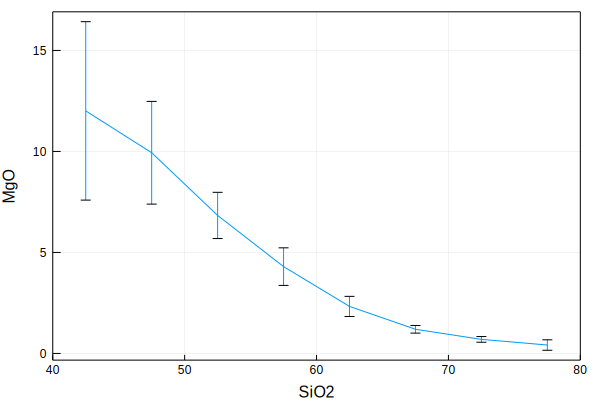

In [4]:
# Approach 1: use the bulk-resampled dataset we just created

# Calculate mean MgO for 8 bins between 40% SiO2 and 80% SiO2 from resampled dataset
# (c = bin centers, m = means, e = 1-sigma S.E.M)
(c,m,e) = binmeans(mctest["SiO2"],mctest["MgO"],40,80,8; resamplingratio=nresamplings)

# Plot results
plot(c,m,yerror=2*e,label="",xlabel="SiO2", ylabel="MgO",xlims=(40,80),framestyle=:box)

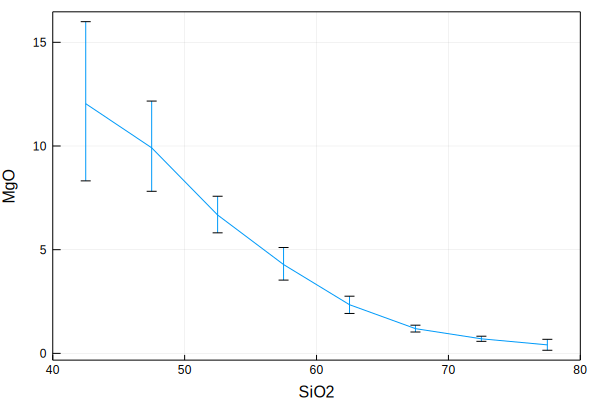

In [5]:
# Approach 2: resample the binned means for one element at a time (Can resample many times)
nresamplings=10000

# Calculate binned means and uncertainties 
# (c = bincenters, m = mean, el = lower 95% CI, eu = upper 95% CI)
(c,m,el,eu) = bin_bsr_means(test["SiO2"],test["MgO"],40,80,8,test["SiO2_sigma"],nresamplings,p)

# Plot results
plot(c,m,yerror=(el,eu),label="",xlabel="SiO2", ylabel="MgO",xlims=(40,80), framestyle=:box)

## Now let's try with a bigger dataset: 
### Reproducing some of the plots from Keller & Schoene 2012

In [6]:
# Install the package for reading matlab .mat files, if necessary
try
    using MAT
catch
    Pkg.add("MAT")
    using MAT
end

# Download and read Keller and Schoene (2012) dataset
download("https://storage.googleapis.com/statgeochem/ign.mat","./ign.mat")
ign = matread("ign.mat")["ign"];

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
 33 9512k   33 3216k    0     0  3476k      0  0:00:02 --:--:--  0:00:02 3476k

In [7]:
# Compute proximity coefficients (inverse weights)
# Since this is pretty computatually intensive, let's load a precomputed version instead

# k = invweight(ign["Latitude"], ign["Longitude"], ign["Age"])
k = ign["k"]

# Probability of keeping a given data point when sampling
p = 1.0./((k.*median(5.0./k))+1.0); # Keep rougly one-fith of the data in each resampling

# Calculate age uncertainty
ign["Age_sigma"] = (ign["Age_Max"]-ign["Age_Min"])/2; 

t = ign["Age_sigma"] .< 50 # Find points with < 50 Ma absolute uncertainty
ign["Age_sigma"][t] = 50; # Set 50 Ma minimum uncertainty (1-sigma)

100 9512k  100 9512k    0     0  5489k      0  0:00:01  0:00:01 --:--:-- 5489k


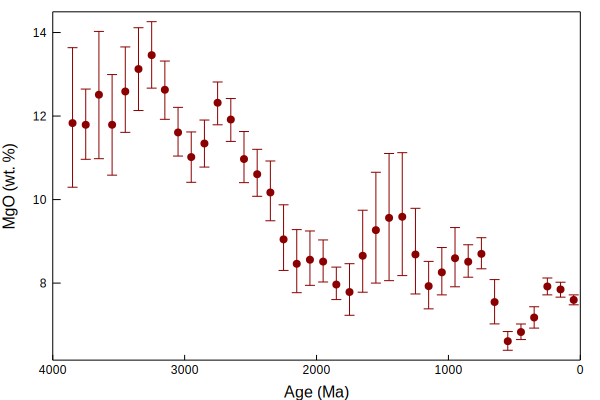

In [8]:
# Try resampling a single variable to reproduce the MgO trend from K&S 2012
nresamplings=1000
xmin = 0
xmax = 3900
nbins = 39

# Look only at samples in the basaltic silica range
# (note that if uncertainty in SiO2 were more significant, we should be resampling this too)
t = (ign["SiO2"].>43) .& (ign["SiO2"].<51)

# Calculate binned means and uncertainties 
# (c = bincenters, m = mean, el = lower 95% CI, eu = upper 95% CI)
(c,m,el,eu) = bin_bsr_means(ign["Age"][t],ign["MgO"][t],xmin,xmax,nbins,ign["Age_sigma"][t],nresamplings,p[t])

# Plot results
plot(c,m,yerror=(el,eu),seriestype=:scatter,color=:darkred,markerstrokecolor=:auto,label="")
plot!(xlabel="Age (Ma)", ylabel="MgO (wt. %)",xlims=(0,4000),framestyle=:box,grid=:off,xflip=true) # Format plot

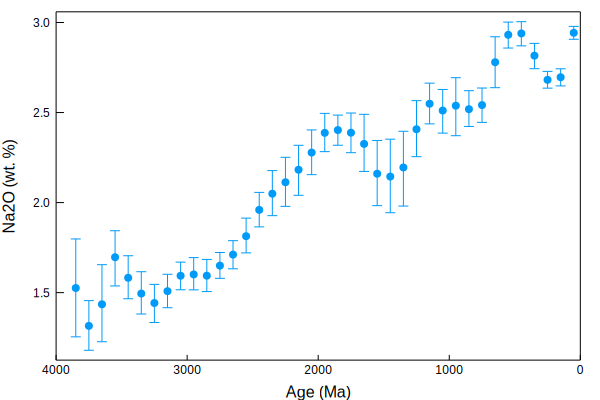

In [12]:
# Same as above, but for Na2O
nresamplings=1000
xmin = 0
xmax = 3900
nbins = 39

# Look only at samples in the basaltic silica range
# (note that if uncertainty in SiO2 were more significant, we should be resampling this too)
t = (ign["SiO2"].>43) .& (ign["SiO2"].<51)

# Calculate binned means and uncertainties 
# (c = bincenter, m = mean, el = lower 95% CI, eu = upper 95% CI)
(c,m,el,eu) = bin_bsr_means(ign["Age"][t],ign["Na2O"][t],xmin,xmax,nbins,ign["Age_sigma"][t],nresamplings,p[t])

# Plot results
plot(c,m,yerror=(el,eu),seriestype=:scatter,markerstrokecolor=:auto,label="")
plot!(xlabel="Age (Ma)", ylabel="Na2O (wt. %)",xlims=(0,4000),framestyle=:box,grid=:off,xflip=true) # Format plot